# 8. Кейс-стади

In [ ]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Задание 1
Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [ ]:
games = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
games

1) Как критики относятся к спортивным играм?

- H0: средняя удовлетворенность критиков играми в жанре Sports >= 70 баллов
- H1: средняя удовлетворенность критиков играми в жанре Sports < 70 баллов

Пусть alpha = 0.05

In [ ]:
sport = games[['Name', 'Genre', 'Global_Sales', 'Critic_Score']]
sport = sport[sport['Genre'] == 'Sports']

sport.describe()

,Global_Sales,Critic_Score
count,2348.000000,1194.000000
mean,0.567291,71.968174
std,2.084460,13.878433
min,0.010000,19.000000
25%,0.090000,64.000000
50%,0.220000,75.000000
75%,0.552500,82.000000
max,82.530000,98.000000


In [ ]:
sport[sport['Critic_Score'].isnull()]

In [ ]:
#предполагаю, что пропуски можно заполнить на основании данных столбца "глобальные продажи"

# sport['Critic_Score'] = sport['Critic_Score'].fillna(sport.groupby('Global_Sales')['Critic_Score'].transform('median'))

# sport.describe()

**Давайте посмотрим на гистограмму**

In [ ]:
plt.hist(sport['Critic_Score'])

In [ ]:
pip install --upgrade scipy

In [ ]:
alpha = 0.05
result = st.ttest_1samp(sport['Critic_Score'], 70, alternative='less')

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее меньше 70 баллов')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


- опишите полученные результаты статистического теста:

Критики (при том, что в данных около 50% игр не имеют оценки) достаточно высоко оценивают игры в жанре Sport, средняя оценка превышает 70 баллов из 100 возможных.

2) Критикам нравятся больше игры на PC или на PS4?

- H0: удовлетворенность критиков играми на PC & PS4 одинаковая
- H1: удовлетворенность критиков играми на PC & PS4 разная (больше или меньше, там посмотрим)

Пусть alpha = 0.05

In [ ]:
platform = games[['Name', 'Platform', 'Global_Sales', 'Critic_Score']]
platform = platform[(platform['Platform'] == 'PC') | (platform['Platform'] == 'PS4')]

platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 31 to 16709
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1367 non-null   object 
 1   Platform      1367 non-null   object 
 2   Global_Sales  1367 non-null   float64
 3   Critic_Score  967 non-null    float64
dtypes: float64(2), object(2)
memory usage: 53.4+ KB


In [ ]:
#platform.describe()

In [ ]:
#plt.hist(platform['Critic_Score'])

In [ ]:
# platform['Critic_Score'] = platform['Critic_Score'].fillna(platform.groupby('Global_Sales')['Critic_Score'].transform('median'))
# platform.describe()

In [ ]:
plt.hist(platform['Critic_Score'])

In [ ]:
pl_PC = platform[platform['Platform'] == 'PC']
pl_PS4 = platform[platform['Platform'] == 'PS4']

In [ ]:
alpha = 0.05
result = st.ttest_ind(pl_PC['Critic_Score'], pl_PS4['Critic_Score'], equal_var=False)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, удовлетворенность критиков играми на PC & PS4 разная')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


Вывод: так как мы не отвергаем H0, то можем сказать, что игроки в целом одинаково удовлетворены играми на PC и играми на PS4.
Войну между пэкашниками и консольщиками можно считать завершённой :) 

<small>Хотя в шутеры с геймпада рубиться - это для извращенцев))))) такое вот имхо</small>

3) Критикам больше нравятся стрелялки или стратегии?

- H0: критики одинаково оценивают стрелялки и стратегии
- H1: критики по-разному оценивают стрелялки и стратегии

Пусть alpha = 0.05

In [ ]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
huinya = games[['Name', 'Genre', 'Global_Sales', 'Critic_Score']]
shoot = huinya[huinya['Genre'] == 'Shooter']
strat = huinya[huinya['Genre'] == 'Strategy']

shoot.info(), strat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 9 to 16710
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1323 non-null   object 
 1   Genre         1323 non-null   object 
 2   Global_Sales  1323 non-null   float64
 3   Critic_Score  944 non-null    float64
dtypes: float64(2), object(2)
memory usage: 51.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 168 to 16706
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          683 non-null    object 
 1   Genre         683 non-null    object 
 2   Global_Sales  683 non-null    float64
 3   Critic_Score  302 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.7+ KB


(None, None)

In [ ]:
# shoot['Critic_Score'] = shoot['Critic_Score'].fillna(shoot.groupby('Global_Sales')['Critic_Score'].transform('median'))
# strat['Critic_Score'] = strat['Critic_Score'].fillna(strat.groupby('Global_Sales')['Critic_Score'].transform('median'))

In [ ]:
alpha = 0.05
result = st.ttest_ind(shoot['Critic_Score'], strat['Critic_Score'], equal_var=False)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, критики по-разному оценивают стрелялки и стратегии')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


результат странный, надо посмотреть визуально на распределение оценок

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


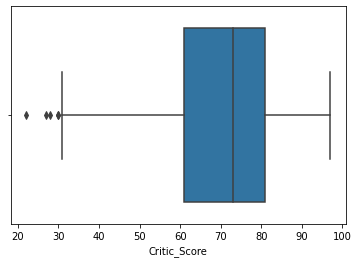

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


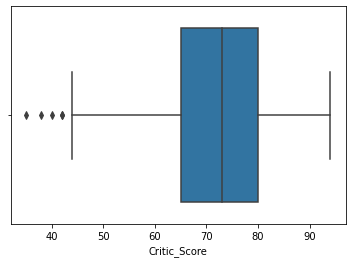

In [ ]:
sns.boxplot(shoot['Critic_Score'])
plt.show()
sns.boxplot(strat['Critic_Score'])

хм, действительно оценки критиков шутеров и стратегий не сильно различаются, окей

### Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

- Привидите весь текст к нижнему регистру;
- Удалите мусорные символы;
- Удалите стоп-слова;
- Привидите все слова к начальной форме;
- Преобразуйте все сообщения в вектора TF-IDF. Можете поэкспериментировать с параметрами TfidfVectorizer;
- Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
- Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
- Опишите результаты при помощи confusion_matrix;
- Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
spam = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
spam.loc[spam.Category == 'ham', 'Class'] = 1
spam.loc[spam.Category == 'spam', 'Class'] = 0

spam['Class'] = spam['Class'].astype('int')
spam = spam.drop(['Category'], axis=1)

In [ ]:
spam_class = spam['Class']

In [ ]:
#Привидите весь текст к нижнему регистру
spam['Message'] = spam['Message'].str.lower()

#Удалите мусорные символы
spam['Message'] = spam['Message'].replace(['[\W_]+'], [' '], regex=True)

In [ ]:
#Удалите стоп-слова:
spam['Message'] = spam['Message'].str[1:-1].str.split(' ').tolist()

nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
spam['Message'] = pd.Series([[word for word in text if word not in stopwords_set] for text in spam['Message']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Привидите все слова к начальной форме:

nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

spam['Message'] = pd.Series([wordnet_lemmatizer.lemmatize(word) for word in text] for text in spam['Message'])

# spam['Message']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
dictionary = corpora.Dictionary(spam['Message'])
dict(dictionary)

In [ ]:
bows = [dictionary.doc2bow(text) for text in spam['Message']]
bows

In [ ]:
# spam['Message']

In [ ]:
#Преобразуйте все сообщения в вектора TF-IDF:

tfidf = TfidfVectorizer(stop_words=stopwords_set)
tfidf_matrix = tfidf.fit_transform(spam['Message'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_matrix

In [ ]:
tfidf_matrix.describe()

In [ ]:
#Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42

x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, spam_class, random_state = 42, test_size = 0.30)

In [ ]:
#Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных

clf = LogisticRegression(random_state=42).fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.predict_proba(x_test)

clf.score(x_test, y_test)

0.9569377990430622

In [ ]:
#Опишите результаты при помощи confusion_matrix

confusion_matrix(y_test, pd.Series(y_pred))

array([[ 155,   69],
       [   3, 1445]])

In [ ]:
#Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного)

result = pd.DataFrame([y_test, y_pred]).T
result

,Class,Unnamed 0
3245,1.0,NaN
944,1.0,1.0
1044,1.0,1.0
2484,1.0,NaN
812,1.0,1.0
...,...,...
2505,1.0,NaN
2525,0.0,NaN
4975,1.0,NaN
650,0.0,1.0


In [ ]:
result['texts'] = spam['Message']
result

,Class,Unnamed 0,texts
3245,1.0,NaN,Squeeeeeze!! This is christmas hug.. If u lik ...
944,1.0,1.0,And also I've sorta blown him off a couple tim...
1044,1.0,1.0,Mmm thats better now i got a roast down me! i...
2484,1.0,NaN,Mm have some kanji dont eat anything heavy ok
812,1.0,1.0,So there's a ring that comes with the guys cos...
...,...,...,...
2505,1.0,NaN,"Hello, my boytoy! I made it home and my consta..."
2525,0.0,NaN,FREE entry into our £250 weekly comp just send...
4975,1.0,NaN,Aiyo u so poor thing... Then u dun wan 2 eat? ...
650,0.0,1.0,"You have won ?1,000 cash or a ?2,000 prize! To..."


In [ ]:
result[((result['Class'] == 0) & (result['Unnamed 0'] == 1.0)) | ((result['Class'] == 1) & (result['Unnamed 0'] == 0.0))]

,Class,Unnamed 0,texts
401,0.0,1.0,FREE RINGTONE text FIRST to 87131 for a poly o...
881,0.0,1.0,Reminder: You have not downloaded the content ...
1598,0.0,1.0,URGENT! Your Mobile number has been awarded wi...
296,0.0,1.0,T-Mobile customer you may now claim your FREE ...
8,0.0,1.0,WINNER!! As a valued network customer you have...
...,...,...,...
188,0.0,1.0,Please call our customer service representativ...
270,0.0,1.0,Ringtone Club: Get the UK singles chart on you...
461,1.0,0.0,Where did u go? My phone is gonna die you have...
551,1.0,0.0,Imagine you finally get to sink into that bath...
